### Import Dataset

In [1]:
import pandas as pd

g_csv_name = ["New_Nozzle_set1", "New_Nozzle_set2", "New_Nozzle_set3"]
b_csv_name = "Good_Nozzle_set1"

g_df_0 = pd.read_csv(f"../data/{g_csv_name[0]}.csv")
g_df_1 = pd.read_csv(f"../data/{g_csv_name[1]}.csv")
g_df_2 = pd.read_csv(f"../data/{g_csv_name[2]}.csv")
b_df = pd.read_csv(f"../data/{b_csv_name}.csv")


In [2]:
# New_Nozzle_set1.csv
g_start_time = "4:49:00 pm"
g_end_time = "4:53:59 pm"
g_nozzle_df_0 = g_df_0[
    (g_df_0["Time"] >= g_start_time) &
    (g_df_0["Time"] <= g_end_time)
].reset_index(drop=True)

# New_Nozzle_set2.csv
g_start_time = "4:59:00 pm"
g_end_time = "5:03:59 pm"
g_nozzle_df_1 = g_df_1[
    (g_df_1["Time"] >= g_start_time) &
    (g_df_1["Time"] <= g_end_time)
].reset_index(drop=True)

# New_Nozzle_set3.csv
g_start_time = "5:10:00 pm"
g_end_time = "5:14:59 pm"
g_nozzle_df_2 = g_df_2[
    (g_df_2["Time"] >= g_start_time) &
    (g_df_2["Time"] <= g_end_time)
].reset_index(drop=True)

# Combine all data along rows (axis=0)
g_df = pd.concat([g_nozzle_df_0, g_nozzle_df_1, g_nozzle_df_2], axis=0, ignore_index=True)

print(f"Number of data points for ground truth: {len(g_df)}")

g_df.head()

Number of data points for ground truth: 900


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,5/12/2024,4:49:00 pm,0,Double[12],0,0,0,1000,4.995,1797,301.9,0,62.26,62.61,5.187,0.002
1,5/12/2024,4:49:01 pm,0,Double[12],0,0,0,1000,4.995,1797,299.4,0,62.26,62.61,5.187,0.002
2,5/12/2024,4:49:02 pm,0,Double[12],0,0,0,1000,4.995,1797,300.4,0,62.26,62.61,5.187,0.002
3,5/12/2024,4:49:03 pm,0,Double[12],0,0,0,1000,4.995,1797,298.3,0,62.26,62.61,5.187,0.002
4,5/12/2024,4:49:04 pm,0,Double[12],0,0,0,1000,4.993,1797,298.6,0,62.26,62.61,5.187,0.002


In [3]:
# Bad_Nozzle_set1.csv
# b_start_time = "4:28:00 pm"
# b_end_time = "4:32:59 pm"

# Bad_Nozzle_set2.csv
# b_start_time = "11:37:00 am"
# b_end_time = "11:41:59 am"

# Bad_Nozzle_set3.csv
# b_start_time = "11:45:00 am"
# b_end_time = "11:49:59 am"

# Worst_Nozzle_set1.csv
# b_start_time = "6:10:00 pm"
# b_end_time = "6:14:59 pm"

# Worst_Nozzle_set2.csv
# b_start_time = "10:59:00 am"
# b_end_time = "11:03:59 am"

# Worst_Nozzle_set3.csv
# b_start_time = "11:13:00 am"
# b_end_time = "11:17:59 am"

# Good_Nozzle_set1.csv
b_start_time = "4:47:00 pm"
b_end_time = "4:51:59 pm"
b_nozzle_df = b_df[
    (b_df["Time"] >= b_start_time) &
    (b_df["Time"] <= b_end_time)
].reset_index(drop=True)

print(f"Number of data points for process monitoring: {len(b_nozzle_df)}")

b_nozzle_df.head()


Number of data points for process monitoring: 300


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,4/12/2024,4:47:00 pm,0,Double[12],-509.83,-2213.82,1278.23,1001,4.999,1724,299.0,0,62.26,62.64,5.185,0.002
1,4/12/2024,4:47:01 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.999,1725,301.0,0,62.26,62.64,5.185,0.002
2,4/12/2024,4:47:02 pm,0,Double[12],-509.83,-2213.82,1278.23,1001,5.002,1729,301.1,0,62.26,62.64,5.187,0.002
3,4/12/2024,4:47:03 pm,0,Double[12],-509.83,-2213.82,1278.23,1001,5.002,1732,299.8,0,62.26,62.64,5.187,0.002
4,4/12/2024,4:47:04 pm,0,Double[12],-509.83,-2213.82,1278.23,1001,5.002,1734,299.4,0,62.26,62.64,5.190,0.002


### Exploratory Data Analysis (EDA)

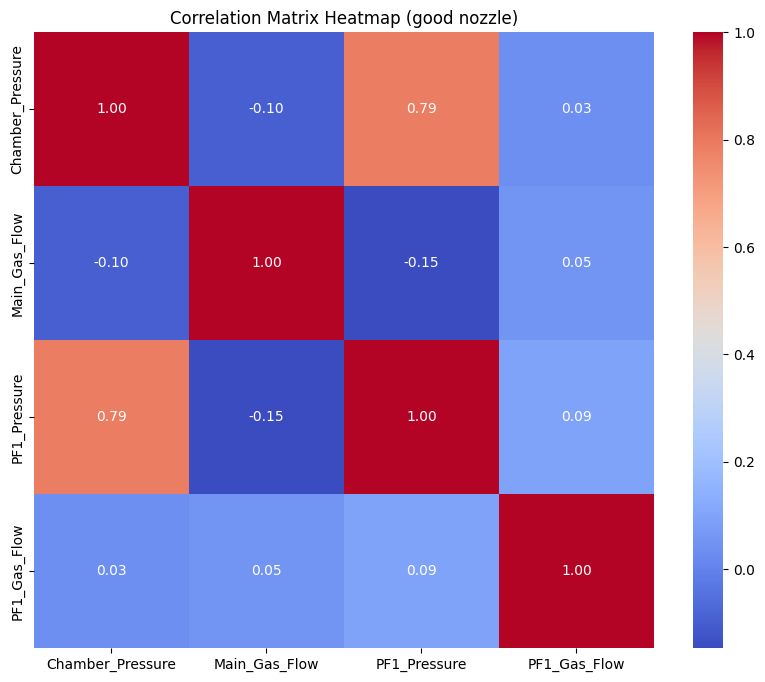

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"]

# Filter the DataFrame for good nozzle process parameters
g_pros_param_df = g_df[pros_param]

# Compute the covariance matrix
g_corr_matrix = g_pros_param_df.corr(method='spearman')  # or 'kendall'

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(g_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap (good nozzle)")
# plt.savefig(f"../graphs/{g_csv_name}_cor_matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


Mean of Main Gas Flow (Good Nozzle)              : 1784.3644444444444
Standard Deviation of Main Gas Flow (Good Nozzle): 6.3950034508045785
Mean of Main Gas Flow (Bad Nozzle)               : 1745.3266666666666
Standard Deviation of Main Gas Flow (Bad Nozzle) : 11.496374307677277


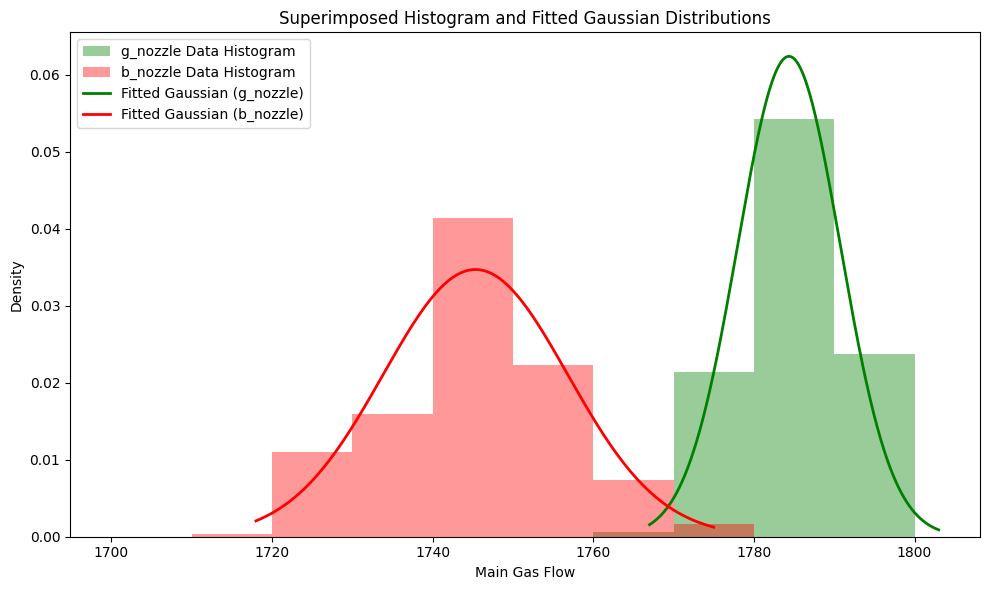

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

b_pros_param_df = b_nozzle_df[pros_param]

# Assuming g_nozzle_df["Main_Gas_Flow"] and b_nozzle_df["Main_Gas_Flow"] are available
g_main_gas_flow = g_pros_param_df["Main_Gas_Flow"]
b_main_gas_flow = b_pros_param_df["Main_Gas_Flow"]

# Calculate mean and std for both datasets
mean_g = np.mean(g_main_gas_flow)
std_g = np.std(g_main_gas_flow)

mean_b = np.mean(b_main_gas_flow)
std_b = np.std(b_main_gas_flow)

# Fit Gaussian distributions
x_g = np.linspace(min(g_main_gas_flow), max(g_main_gas_flow), 1000)
pdf_fitted_g = norm.pdf(x_g, mean_g, std_g)

x_b = np.linspace(min(b_main_gas_flow), max(b_main_gas_flow), 1000)
pdf_fitted_b = norm.pdf(x_b, mean_b, std_b)

# Print mean and std for both
print(f"Mean of Main Gas Flow (Good Nozzle)              : {mean_g}")
print(f"Standard Deviation of Main Gas Flow (Good Nozzle): {std_g}")
print(f"Mean of Main Gas Flow (Bad Nozzle)               : {mean_b}")
print(f"Standard Deviation of Main Gas Flow (Bad Nozzle) : {std_b}")

bins = 10

# Find the global min and max to ensure both histograms have the same range
min_range = 1700
max_range = 1800

# Plotting histograms and Gaussian fits superimposed
plt.figure(figsize=(10, 6))

# Histogram for g_nozzle with Gaussian fit
plt.hist(g_main_gas_flow, bins=bins, density=True, alpha=0.4, color='g', label='g_nozzle Data Histogram', range=(min_range, max_range))

# Histogram for b_nozzle with Gaussian fit
plt.hist(b_main_gas_flow, bins=bins, density=True, alpha=0.4, color='r', label='b_nozzle Data Histogram', range=(min_range, max_range))

# Plot fitted Gaussian distributions
plt.plot(x_g, pdf_fitted_g, 'g', linewidth=2, label='Fitted Gaussian (g_nozzle)')
plt.plot(x_b, pdf_fitted_b, 'r', linewidth=2, label='Fitted Gaussian (b_nozzle)')

# Adding labels and legend
plt.title('Superimposed Histogram and Fitted Gaussian Distributions')
plt.xlabel('Main Gas Flow')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
# plt.savefig(f"../graphs/{g_csv_name}-vs-{b_csv_name}_hist.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


### Unsupervised Learning

Mahalanobis Distance, Elliptic Envelope, Isolation Forest, One-class SVM

In [6]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from distancia import Mahalanobis
from scipy.stats import chi2

good_data = g_pros_param_df.to_numpy()
unseen_data = b_pros_param_df.to_numpy()

print(good_data.shape)
print(unseen_data.shape)

# Rolling average for process monitoring
window_size = 60
rolling_data = pd.DataFrame(unseen_data).rolling(window=window_size).mean().dropna()

# 1. Train models
# Mahalanobis Distance
# cov_matrix = np.cov(good_data, rowvar=False)
# inv_cov_matrix = np.linalg.inv(cov_matrix)
# mean_vector = np.mean(good_data, axis=0)

# Elliptic Envelope
elliptic_model = EllipticEnvelope().fit(good_data)

# Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42).fit(good_data)

# One-Class SVM
one_class_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma="scale").fit(good_data)

# 2. Process Monitoring Simulation
results = []
for idx, row in rolling_data.iterrows():
    data_point = row.values
    
    # Mahalanobis Distance
    mahalanobis_score = Mahalanobis().calculate(data_point, good_data)
    
    # Elliptic Envelope
    elliptic_score = elliptic_model.decision_function([data_point])[0]
    
    # Isolation Forest
    isolation_score = isolation_forest.decision_function([data_point])[0]
    
    # One-Class SVM
    svm_score = one_class_svm.decision_function([data_point])[0]
    
    results.append({
        "index": idx,
        "mahalanobis_score": mahalanobis_score,
        "elliptic_score": elliptic_score,
        "isolation_score": isolation_score,
        "svm_score": svm_score
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df['mahalanobis_anomaly'] = results_df['mahalanobis_score'] > 6
results_df['elliptic_anomaly'] = results_df['elliptic_score'] < 0
results_df['isolation_anomaly'] = results_df['isolation_score'] < 0
results_df['svm_anomaly'] = results_df['svm_score'] < 0

print(results_df)

(900, 4)
(300, 4)
     index  mahalanobis_score  elliptic_score  isolation_score  svm_score  \
0       59           8.452225      -87.029521        -0.098078  -0.100260   
1       60           8.404293      -86.101198        -0.095555  -0.099094   
2       61           8.356830      -85.152377        -0.098078  -0.098004   
3       62           8.312244      -83.998052        -0.098078  -0.097190   
4       63           8.272520      -82.937549        -0.098078  -0.096515   
..     ...                ...             ...              ...        ...   
236    295           5.336655      -25.742536        -0.040231  -0.039471   
237    296           5.285092      -25.287318        -0.033375  -0.038770   
238    297           5.261689      -25.200857        -0.035693  -0.038377   
239    298           5.239244      -25.262838        -0.037891  -0.037987   
240    299           5.234337      -25.356614        -0.037104  -0.038074   

     mahalanobis_anomaly  elliptic_anomaly  isolation_ano

In [7]:
import imageio

rolling_window_size = 60  # Rolling window size
# rolling_data = pd.Series(b_main_gas_flow).rolling(window=rolling_window_size).mean()

# Generate frames for the GIF
frames = []
output_folder = "frames"

# Create output folder if it doesn't exist
import os
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i in range(len(b_main_gas_flow) - rolling_window_size + 1):
    plt.figure(figsize=(10, 6))

    # Plot all data points
    plt.scatter(range(len(b_main_gas_flow)), b_main_gas_flow, label="Data Not Being Observed", alpha=0.5, color='gray')

    # Mark all points within the current rolling window as either anomaly or non-anomaly
    window_anomaly = results_df['mahalanobis_anomaly'][i:i + rolling_window_size]
    window_points = range(i, i + rolling_window_size)

    if window_anomaly.any():
        # If any anomalies in the window, mark all points in the window as red
        plt.scatter(window_points, b_main_gas_flow[i:i + rolling_window_size], color='red', label="Data Being Observed")
    else:
        # If no anomalies in the window, mark all points in the window as green
        plt.scatter(window_points, b_main_gas_flow[i:i + rolling_window_size], color='green', label="Data Being Observed")

    # Highlight the current rolling window
    plt.axvline(i + rolling_window_size - 1, color='gray', linestyle='--', alpha=0.5, label="Current Window End")
    plt.axvline(i - 1, color='gray', linestyle='--', alpha=0.5, label="Current Window Start")

    plt.legend()
    plt.title(f"Rolling Window Visualization (Window ending at {i + rolling_window_size - 1})")
    plt.xlabel("Timestamp")
    plt.ylabel("Gas Flow Rate")

    # Save frame
    frame_path = f"{output_folder}/frame_{i}.png"
    plt.savefig(frame_path)
    plt.close()
    frames.append(frame_path)

# Combine frames into a GIF
gif_path = "rolling_window.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.1) as writer:  # duration sets frame speed
    for frame_path in frames:
        writer.append_data(imageio.imread(frame_path))

# Clean up temporary files
for frame_path in frames:
    os.remove(frame_path)

print(f"GIF saved as {gif_path}")

C:\Users\yongz\AppData\Local\Temp\ipykernel_21732\2189106283.py:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(frame_path))


GIF saved as rolling_window.gif
